# ProjectDetails and working platform.
The BigSupplyCo. project was executed using Google Colab. The dataset for this project was provided by the DS-4 platform and includes five datasets, namely product, category, order, customer, and department. These datasets contain valuable information about customers, order countries, product categories, product departments, delivery status, geographical details, and more.

In this data set we need to imagine the retail sphere as a set of customer segments, each with unique characteristics and behaviors. The challenge delves into the dynamics of customer retention, analyzing the factors that bind shoppers to brands and unveiling strategies to enhance loyalty.






## Data wrangling investigation:
There are null values in the 'zipcode' column, and similar null values are present in other tables. Additionally, the date and time columns need to be converted from the 'object' data type to the 'datetime' data type. There is also a requirement to update some column names.

# Data Cleaning


*   Remove spaces from column names, and renamed
*   Removed duplicates
*   Converted data time from object to date time data type
*   Dropped unnecessary columns
*   Parsed datetime columns into date, month, and year columns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_categories = pd.read_csv('/content/drive/My Drive/BigSupplyCo_Categories.csv')

In [4]:
df_customers = pd.read_csv('/content/drive/My Drive/BigSupplyCo_Customers.csv')

In [5]:
 df_departments = pd.read_csv('/content/drive/My Drive/BigSupplyCo_Departments.csv')

In [6]:
# To read encoded csv file, saved csv UTF-8 from csv, all encoded words converted into readable format
df_orders = pd.read_csv('/content/drive/My Drive/BigSupplyCo_Orders.csv' )

In [7]:
 df_products = pd.read_csv('/content/drive/My Drive/BigSupplyCo_Products.csv')

# Product Table

In [8]:
df_products.shape

(118, 7)

In [9]:
 df_products.columns = df_products.columns.str.replace(' ', '_')
 df_products.columns

Index(['Product_Card_Id', 'Product_Category_Id', 'Product_Description',
       'Product_Image', 'Product_Name', 'Product_Price', 'Product_Status'],
      dtype='object')

In [10]:
df_products.describe()

,Product_Card_Id,Product_Category_Id,Product_Description,Product_Price,Product_Status
count,118.000000,118.000000,0.0,118.000000,118.0
mean,689.576271,33.449153,NaN,166.412966,0.0
std,403.120380,19.292883,NaN,262.184328,0.0
min,19.000000,2.000000,NaN,9.990000,0.0
25%,303.500000,17.000000,NaN,31.990000,0.0
50%,729.000000,35.000000,NaN,87.195000,0.0
75%,905.750000,40.750000,NaN,199.990005,0.0
max,1363.000000,76.000000,NaN,1999.989990,0.0


In [11]:
df_products.Product_Description.value_counts()

Series([], Name: Product_Description, dtype: int64)

In [12]:
df_products.head()

,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status
0,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0
1,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0
2,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0
3,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0
4,278,13,NaN,http://images.acmesports.sports/Under+Armour+M...,Under Armour Men's Compression EV SL Slide,44.990002,0


In [13]:
df_products.drop('Product_Description', axis=1, inplace = True)
df_products.columns

Index(['Product_Card_Id', 'Product_Category_Id', 'Product_Image',
       'Product_Name', 'Product_Price', 'Product_Status'],
      dtype='object')

In [14]:
df_products.Product_Status.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
df_products.head(20)

,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status
0,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0
1,365,17,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0
2,627,29,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0
3,502,24,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0
4,278,13,http://images.acmesports.sports/Under+Armour+M...,Under Armour Men's Compression EV SL Slide,44.990002,0
5,249,12,http://images.acmesports.sports/Under+Armour+W...,Under Armour Women's Micro G Skulpt Running S,54.970001,0
6,191,9,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0
7,917,41,http://images.acmesports.sports/Glove+It+Women...,Glove It Women's Mod Oval 3-Zip Carry All Gol,21.990000,0
8,828,37,http://images.acmesports.sports/Bridgestone+e6...,Bridgestone e6 Straight Distance NFL San Dieg,31.990000,0
9,642,29,http://images.acmesports.sports/Columbia+Men%2...,Columbia Men's PFG Anchor Tough T-Shirt,30.000000,0


In [16]:
df_products.tail(10)

,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status
108,677,31,http://images.acmesports.sports/TaylorMade+Whi...,TaylorMade White Smoke IN-12 Putter,99.989998,0
109,671,31,http://images.acmesports.sports/Cleveland+Golf...,Cleveland Golf Collegiate My Custom Wedge 588,209.990005,0
110,666,30,http://images.acmesports.sports/Merrell+Men%27...,Merrell Men's All Out Flash Trail Running Sho,109.989998,0
111,652,30,http://images.acmesports.sports/Merrell+Women%...,Merrell Women's Grassbow Sport Waterproof Hik,129.990005,0
112,647,30,http://images.acmesports.sports/Merrell+Women%...,Merrell Women's Siren Mid Waterproof Hiking B,134.990005,0
113,646,30,http://images.acmesports.sports/Merrell+Women%...,Merrell Women's Grassbow Sport Hiking Shoe,99.989998,0
114,1361,74,http://images.acmesports.sports/Toys,Toys,11.540000,0
115,1073,48,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.990005,0
116,1059,48,http://images.acmesports.sports/Pelican+Maveri...,Pelican Maverick 100X Kayak,349.989990,0
117,1014,46,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.980000,0


In [17]:
 df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Card_Id      118 non-null    int64  
 1   Product_Category_Id  118 non-null    int64  
 2   Product_Image        118 non-null    object 
 3   Product_Name         118 non-null    object 
 4   Product_Price        118 non-null    float64
 5   Product_Status       118 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.7+ KB


In [18]:
#find duplicate rows across all columns
dup_rows_product = df_products[df_products.duplicated()]
dup_rows_product

,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status


<ipython-input-19-935f6de38471>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_products.corr(), annot=True, cmap='coolwarm')


<Axes: >

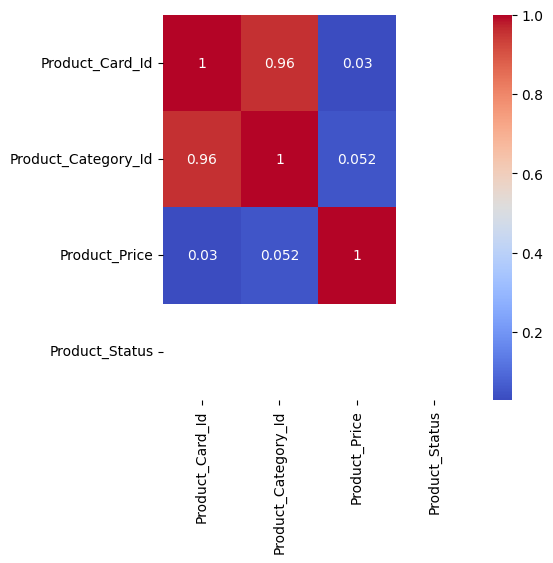

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(df_products.corr(), annot=True, cmap='coolwarm')

Not all variables exhibit correlations with other attributes.

# Category Table

In [20]:
df_categories.describe()

,Category Id
count,51.000000
mean,40.000000
std,23.911504
min,2.000000
25%,17.500000
50%,38.000000
75%,63.500000
max,76.000000


In [21]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category Id    51 non-null     int64 
 1   Category Name  51 non-null     object
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [22]:
df_categories.isnull().any()

Category Id      False
Category Name    False
dtype: bool

In [23]:
df_categories.head()

,Category Id,Category Name
0,73,Sporting Goods
1,17,Cleats
2,29,Shop By Sport
3,24,Women's Apparel
4,13,Electronics


In [24]:
df_categories.columns = df_categories.columns.str.replace(' ', '_')

In [25]:
df_categories.columns

Index(['Category_Id', 'Category_Name'], dtype='object')

In [26]:
df_cat_name = df_categories.groupby('Category_Name')['Category_Id'].count().sort_values(ascending=False)
df_cat_name.head()

Category_Name
Electronics           2
Accessories           1
Pet Supplies          1
Hockey                1
Hunting & Shooting    1
Name: Category_Id, dtype: int64

In [27]:
df_departments.head(20)

,Department Id,Department Name,Latitude,Longitude
0,2,Fitness,18.251453,-66.037056
1,2,Fitness,18.279451,-66.037064
2,2,Fitness,37.292233,-121.881279
3,2,Fitness,34.125946,-118.291016
4,2,Fitness,18.253769,-66.037048
5,2,Fitness,43.013969,-78.879066
6,2,Fitness,18.242538,-66.037056
7,2,Fitness,25.928869,-80.162872
8,2,Fitness,18.233223,-66.037056
9,2,Fitness,37.773991,-121.966629


# Department Table

In [28]:
df_departments.describe()

,Department Id,Latitude,Longitude
count,41956.000000,41956.000000,41956.000000
mean,5.331276,27.241258,-81.103229
std,2.042899,9.874369,20.629969
min,2.000000,-33.937553,-158.025986
25%,4.000000,18.247580,-90.110939
50%,5.000000,18.298394,-66.370636
75%,7.000000,36.841560,-66.370552
max,12.000000,48.781933,115.263077


In [29]:
df_departments.tail()

,Department Id,Department Name,Latitude,Longitude
41951,7,Fan Shop,34.045147,-118.248482
41952,7,Fan Shop,18.229948,-66.370560
41953,7,Fan Shop,18.264967,-66.370636
41954,7,Fan Shop,32.801689,-116.978561
41955,7,Fan Shop,37.623436,-121.119720


In [30]:
df_departments.shape

(41956, 4)

In [31]:
dup_dep_rows = df_departments[df_departments.duplicated()]
dup_dep_rows

,Department Id,Department Name,Latitude,Longitude


In [32]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41956 entries, 0 to 41955
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department Id    41956 non-null  int64  
 1   Department Name  41956 non-null  object 
 2   Latitude         41956 non-null  float64
 3   Longitude        41956 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ MB


# Order Table

In [33]:
df_orders.tail(5)

,Order Id,Order Item Cardprod Id,Order Customer Id,Order Department Id,Market,Order City,Order Country,Order Region,Order State,Order Status,...,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery Risk
180514,26043,1004,1005,7,Pacific Asia,Shanghai,China,Eastern Asia,Shanghai,CLOSED,...,65177,1,399.980011,399.980011,40.000000,CASH,4,4,Shipping on time,0
180515,26037,1004,9141,7,Pacific Asia,Hirakata,Japan,Eastern Asia,Osaka,COMPLETE,...,65161,1,399.980011,395.980011,-613.770019,DEBIT,3,2,Late delivery,1
180516,26024,1004,291,7,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,PENDING,...,65129,1,399.980011,391.980011,141.110001,TRANSFER,5,4,Late delivery,1
180517,26022,1004,2813,7,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,PENDING_PAYMENT,...,65126,1,399.980011,387.980011,186.229996,PAYMENT,3,4,Advance shipping,0
180518,26018,1004,7547,7,Pacific Asia,Nagercoil,India,South Asia,Tamil Nadu,PENDING_PAYMENT,...,65113,1,399.980011,383.980011,168.949997,PAYMENT,4,4,Shipping on time,0


In [34]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Order Id                       180519 non-null  int64  
 1   Order Item Cardprod Id         180519 non-null  int64  
 2   Order Customer Id              180519 non-null  int64  
 3   Order Department Id            180519 non-null  int64  
 4   Market                         180519 non-null  object 
 5   Order City                     180519 non-null  object 
 6   Order Country                  180519 non-null  object 
 7   Order Region                   180519 non-null  object 
 8   Order State                    180519 non-null  object 
 9   Order Status                   180519 non-null  object 
 10  Order Zipcode                  24840 non-null   float64
 11  order date (DateOrders)        180519 non-null  object 
 12  Order Item Discount           

In [35]:
df_orders.describe()

,Order Id,Order Item Cardprod Id,Order Customer Id,Order Department Id,Order Zipcode,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Days for shipping (real),Days for shipment (scheduled),Late Delivery Risk
count,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,36221.894903,692.509764,6691.379495,5.443460,55426.132327,20.664741,0.101668,90260.000000,2.127638,203.772096,183.107609,21.974989,3.497654,2.931847,0.548291
std,21045.379569,336.446807,4162.918106,1.629246,31919.279101,21.800901,0.070415,52111.490959,1.453451,132.273077,120.043670,104.433526,1.623722,1.374449,0.497664
min,1.000000,19.000000,1.000000,2.000000,1040.000000,0.000000,0.000000,1.000000,1.000000,9.990000,7.490000,-4274.979980,0.000000,0.000000,0.000000
25%,18057.000000,403.000000,3258.500000,4.000000,23464.000000,5.400000,0.040000,45130.500000,1.000000,119.980003,104.379997,7.000000,2.000000,2.000000,0.000000
50%,36140.000000,627.000000,6457.000000,5.000000,59405.000000,14.000000,0.100000,90260.000000,1.000000,199.919998,163.990005,31.520000,3.000000,4.000000,1.000000
75%,54144.000000,1004.000000,9779.000000,7.000000,90008.000000,29.990000,0.160000,135389.500000,3.000000,299.950012,247.399994,64.800003,5.000000,4.000000,1.000000
max,77204.000000,1363.000000,20757.000000,12.000000,99301.000000,500.000000,0.250000,180519.000000,5.000000,1999.989990,1939.989990,911.799988,6.000000,4.000000,1.000000


In [36]:
df_orders.columns = df_orders.columns.str.replace(' ', '_')

In [37]:
#df_orders['order_date_(DateOrders)'] = df_orders['order_date_(DateOrders)'].str.replace('_\(DateOrders\)', '', regex=True)
df_orders.rename(columns={'order_date_(DateOrders)': 'order_date'}, inplace=True)



In [38]:
df_orders.columns.str.lower()

Index(['order_id', 'order_item_cardprod_id', 'order_customer_id',
       'order_department_id', 'market', 'order_city', 'order_country',
       'order_region', 'order_state', 'order_status', 'order_zipcode',
       'order_date', 'order_item_discount', 'order_item_discount_rate',
       'order_item_id', 'order_item_quantity', 'sales', 'order_item_total',
       'order_profit', 'type', 'days_for_shipping_(real)',
       'days_for_shipment_(scheduled)', 'delivery_status',
       'late_delivery_risk'],
      dtype='object')

In [39]:
df_orders.isnull().any()

Order_Id                         False
Order_Item_Cardprod_Id           False
Order_Customer_Id                False
Order_Department_Id              False
Market                           False
Order_City                       False
Order_Country                    False
Order_Region                     False
Order_State                      False
Order_Status                     False
Order_Zipcode                     True
order_date                       False
Order_Item_Discount              False
Order_Item_Discount_Rate         False
Order_Item_Id                    False
Order_Item_Quantity              False
Sales                            False
Order_Item_Total                 False
Order_Profit                     False
Type                             False
Days_for_shipping_(real)         False
Days_for_shipment_(scheduled)    False
Delivery_Status                  False
Late_Delivery_Risk               False
dtype: bool

In [40]:
df_orders.groupby('Order_Country')['Order_Zipcode'].count()

Order_Country
Afganistan    0
Albania       0
Alemania      0
Angola        0
Argelia       0
             ..
Vietnam       0
Yemen         0
Yibuti        0
Zambia        0
Zimbabue      0
Name: Order_Zipcode, Length: 164, dtype: int64

In [41]:
zero_zipcode = df_orders.query('Order_Country == "Afganistan"')
zero_zipcode.head()

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,...,Order_Item_Id,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk
365,75889,1360,19442,2,Pacific Asia,Herat,Afganistan,South Asia,Herat,COMPLETE,...,179204,1,327.750000,324.470001,24.340000,DEBIT,5,4,Late delivery,1
366,75888,1360,19441,2,Pacific Asia,Herat,Afganistan,South Asia,Herat,PENDING_PAYMENT,...,179203,1,327.750000,321.200012,-36.299999,PAYMENT,4,4,Shipping on time,0
367,75887,1360,19440,2,Pacific Asia,Herat,Afganistan,South Asia,Herat,COMPLETE,...,179202,1,327.750000,317.920013,111.269997,DEBIT,3,4,Advance shipping,0
1311,20529,502,4497,5,Pacific Asia,Kabul,Afganistan,South Asia,Kabul,PENDING_PAYMENT,...,51266,5,250.000000,245.000000,-127.400002,PAYMENT,5,2,Late delivery,1
2289,25219,627,10510,5,Pacific Asia,Jalalabad,Afganistan,South Asia,Nangarhar,COMPLETE,...,63205,1,39.990002,38.389999,18.809999,DEBIT,5,4,Late delivery,1


In [42]:
#Expand columns so I can see zipcode column's values
pd.set_option('display.max_columns', 24)

In [43]:
zero_zipcode.head()

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk
365,75889,1360,19442,2,Pacific Asia,Herat,Afganistan,South Asia,Herat,COMPLETE,NaN,1/12/2018 18:56,3.28,0.01,179204,1,327.750000,324.470001,24.340000,DEBIT,5,4,Late delivery,1
366,75888,1360,19441,2,Pacific Asia,Herat,Afganistan,South Asia,Herat,PENDING_PAYMENT,NaN,1/12/2018 18:35,6.56,0.02,179203,1,327.750000,321.200012,-36.299999,PAYMENT,4,4,Shipping on time,0
367,75887,1360,19440,2,Pacific Asia,Herat,Afganistan,South Asia,Herat,COMPLETE,NaN,1/12/2018 18:14,9.83,0.03,179202,1,327.750000,317.920013,111.269997,DEBIT,3,4,Advance shipping,0
1311,20529,502,4497,5,Pacific Asia,Kabul,Afganistan,South Asia,Kabul,PENDING_PAYMENT,NaN,10/27/2015 15:52,5.00,0.02,51266,5,250.000000,245.000000,-127.400002,PAYMENT,5,2,Late delivery,1
2289,25219,627,10510,5,Pacific Asia,Jalalabad,Afganistan,South Asia,Nangarhar,COMPLETE,NaN,1/4/2016 2:59,1.60,0.04,63205,1,39.990002,38.389999,18.809999,DEBIT,5,4,Late delivery,1


<ipython-input-44-a3dabf23cbaf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_orders.corr(), annot = True, fmt ='.1g')


<Axes: >

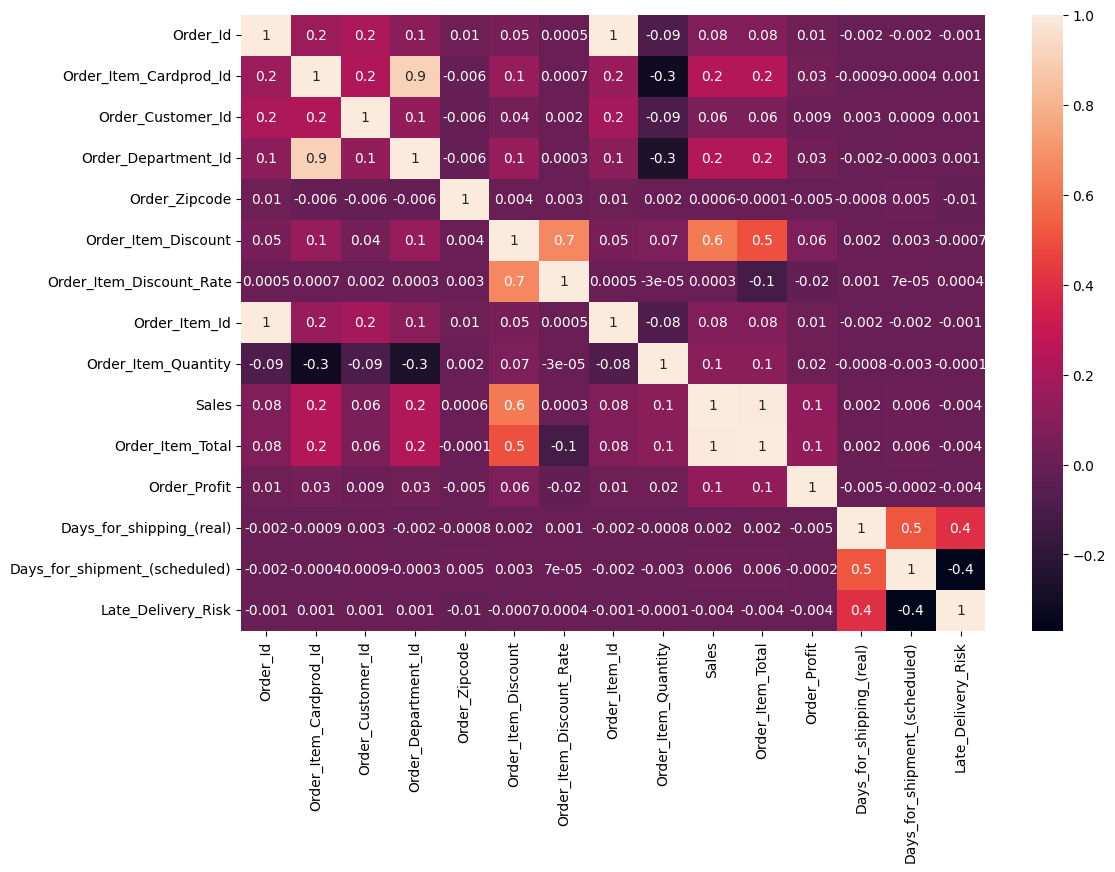

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(df_orders.corr(), annot = True, fmt ='.1g')

Year exhibits a strong positive correlation with Order_Id, indicating a
significant relationship between the year of the order and the unique order identification. In contrast, it shows weaker correlations with other attributes.
Order_Profit displays a negative correlation with Order_Item_Discount_Rate and Zipcode, implying that as the discount rate and the geographical location (zipcode) change, the order's profit tends to decrease. Additionally, Order_Id exhibits a negative correlation with Order_Item_Quantity, suggesting that as the quantity of items in an order increases, the order identification tends to decrease.

In [45]:
#Maximum order region
hgh_rgn_odr = df_orders.groupby(['Order_Region'])['Order_Id'].count().sort_values(ascending = False)
hgh_rgn_odr

Order_Region
Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order_Id, dtype: int64

<Axes: title={'center': 'Higest Order Region'}, xlabel='Order_Region', ylabel='Number of Orders'>

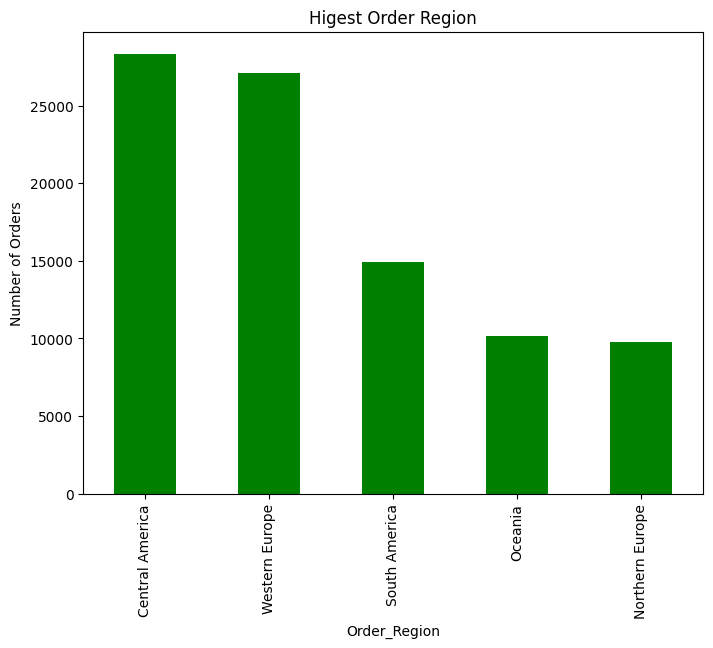

In [46]:
plt.figure(figsize = (8,6))
plt.title("Higest Order Region")
plt.xlabel('Top 5 Highest Order Region')
plt.ylabel('Number of Orders')
hgh_rgn_odr.iloc[:5].plot(kind = 'bar', color = 'g')


Central America has the highest order

<Axes: title={'center': 'Lowest Order Region'}, xlabel='Order_Region', ylabel='Number of Orders'>

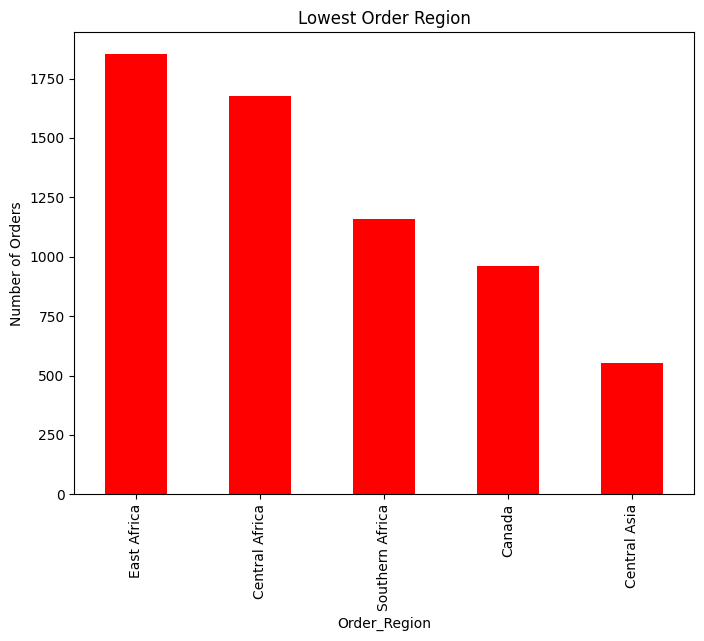

In [47]:
plt.figure(figsize = (8,6))
plt.title("Lowest Order Region")
plt.xlabel('Bottem 5 Order Region')
plt.ylabel('Number of Orders')
hgh_rgn_odr.iloc[-5:].plot(kind = 'bar', color = 'r')


Central Asia has the lowest order.

In [48]:
hgh_cntry_odr = df_orders.groupby("Order_Country")["Order_Id"].count().sort_values(ascending = False)
hgh_cntry_odr

Order_Country
Estados Unidos        24840
Francia               13222
Mexico                13172
Alemania               9564
Australia              8497
                      ...  
SÌÁhara Occidental        2
Kuwait                    2
Eritrea                   2
Burundi                   1
Serbia                    1
Name: Order_Id, Length: 164, dtype: int64

<Axes: title={'center': 'Highest order by country'}, xlabel='Order_Country', ylabel='Number of Orders'>

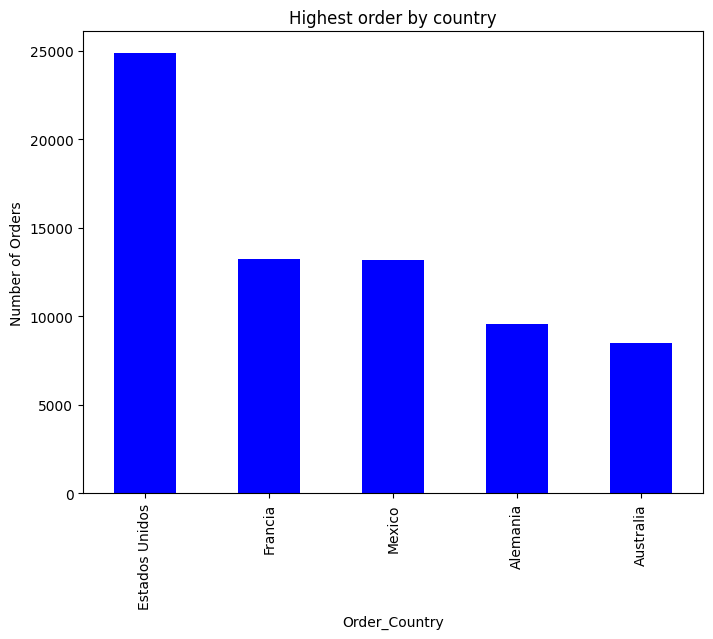

In [49]:
plt.figure(figsize = (8,6))
plt.title("Highest order by country")
plt.xlabel('Top 5 Highest Order Country')
plt.ylabel('Number of Orders')
hgh_cntry_odr.iloc[:5].plot(kind = 'bar', color = 'b')


In [50]:
df_orders['Order_Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order_Status, dtype: int64

In [51]:
odr_sts = df_orders.groupby(['Order_Country', 'Order_Status'])['Order_Item_Cardprod_Id'].count().sort_values(ascending=False)
odr_sts

Order_Country   Order_Status   
Estados Unidos  COMPLETE           8437
                PENDING_PAYMENT    5238
Francia         COMPLETE           4386
Mexico          COMPLETE           4373
Alemania        COMPLETE           3143
                                   ... 
LÌ_bano         PENDING_PAYMENT       1
Bielorrusia     CANCELED              1
Grecia          SUSPECTED_FRAUD       1
Camboya         PAYMENT_REVIEW        1
TayikistÌÁn     ON_HOLD               1
Name: Order_Item_Cardprod_Id, Length: 1106, dtype: int64

In [52]:
#extracting complete order stats from the order table
complete_sts = df_orders[df_orders['Order_Status'] == 'COMPLETE']
complete_sts

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,1/31/2018 22:56,13.110000,0.04,180517,1,327.750000,314.640015,91.250000,DEBIT,3,4,Advance shipping,0
3,75937,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,NaN,1/13/2018 11:45,22.940001,0.07,179252,1,327.750000,304.809998,22.860001,DEBIT,3,4,Advance shipping,0
6,75934,1360,19487,2,Pacific Asia,Guangzhou,China,Eastern Asia,Guangdong,COMPLETE,NaN,1/13/2018 10:42,39.330002,0.12,179249,1,327.750000,288.420013,95.180000,DEBIT,2,1,Late delivery,1
13,75927,1360,19480,2,Pacific Asia,Sangli,India,South Asia,Maharashtra,COMPLETE,NaN,1/13/2018 8:15,81.940002,0.25,179242,1,327.750000,245.809998,24.580000,DEBIT,2,1,Late delivery,1
15,75925,1360,19478,2,Pacific Asia,Sangli,India,South Asia,Maharashtra,COMPLETE,NaN,1/13/2018 7:33,3.280000,0.01,179240,1,327.750000,324.470001,-259.579987,DEBIT,2,1,Late delivery,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180500,26077,1004,773,7,Pacific Asia,Rockhampton,Australia,Oceania,Queensland,COMPLETE,NaN,1/16/2016 15:35,16.000000,0.04,65271,1,399.980011,383.980011,138.229996,DEBIT,3,4,Advance shipping,0
180505,26071,1004,1038,7,Pacific Asia,Qingdao,China,Eastern Asia,Shandong,COMPLETE,NaN,1/16/2016 13:28,40.000000,0.10,65253,1,399.980011,359.980011,112.669998,DEBIT,2,4,Advance shipping,0
180508,26053,1004,8387,7,Pacific Asia,Guangshui,China,Eastern Asia,Hubei,COMPLETE,NaN,1/16/2016 7:10,60.000000,0.15,65206,1,399.980011,339.980011,85.000000,DEBIT,4,2,Late delivery,1
180512,26050,1004,7396,7,Pacific Asia,Chengdu,China,Eastern Asia,Sichuan,COMPLETE,NaN,1/16/2016 6:07,80.000000,0.20,65194,1,399.980011,319.980011,86.400002,DEBIT,6,4,Late delivery,1


In [53]:
complete_sts.groupby('Order_Country')['Order_Customer_Id'].count().sort_values(ascending=False)

Order_Country
Estados Unidos          8437
Francia                 4386
Mexico                  4373
Alemania                3143
Australia               2849
                        ... 
Chad                       3
Surinam                    3
Laos                       2
Burkina Faso               1
RepÌ¼blica del Congo       1
Name: Order_Customer_Id, Length: 151, dtype: int64

Total complete order 59491 out of 180519 which is 3%. Top 3 complete order countries are in Estado Unidos,Francia, and Mexico.

In [54]:
df_orders.columns

Index(['Order_Id', 'Order_Item_Cardprod_Id', 'Order_Customer_Id',
       'Order_Department_Id', 'Market', 'Order_City', 'Order_Country',
       'Order_Region', 'Order_State', 'Order_Status', 'Order_Zipcode',
       'order_date', 'Order_Item_Discount', 'Order_Item_Discount_Rate',
       'Order_Item_Id', 'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit', 'Type', 'Days_for_shipping_(real)',
       'Days_for_shipment_(scheduled)', 'Delivery_Status',
       'Late_Delivery_Risk'],
      dtype='object')

<Axes: xlabel='Order_Profit', ylabel='Order_Item_Total'>

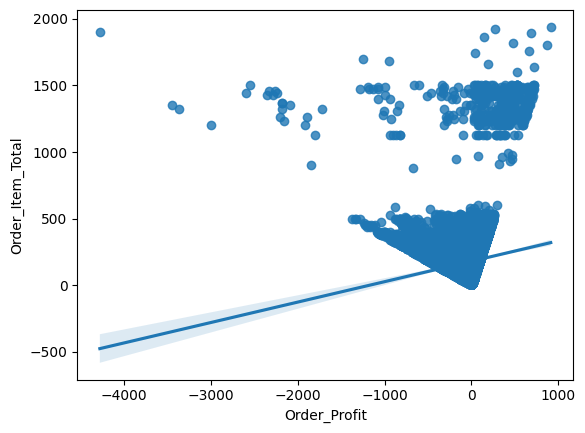

In [55]:
# linear regression, best fit line between Order_Item_total($) and Order_profit($)
sns.regplot(data = df_orders, y = 'Order_Item_Total', x = 'Order_Profit')

In [56]:
#Total suspected fraud
frd_sts = df_orders[df_orders['Order_Status'] == 'SUSPECTED_FRAUD']
frd_sts

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk
10,75930,1360,19483,2,Pacific Asia,Tokio,Japan,Eastern Asia,Tokio,SUSPECTED_FRAUD,NaN,1/13/2018 9:18,55.720001,0.17,179245,1,327.750000,272.029999,130.580002,TRANSFER,6,2,Shipping canceled,0
24,75916,1360,19469,2,Pacific Asia,Brisbane,Australia,Oceania,Queensland,SUSPECTED_FRAUD,NaN,1/13/2018 4:24,39.330002,0.12,179231,1,327.750000,288.420013,90.279999,TRANSFER,2,2,Shipping canceled,0
183,33824,278,1509,3,USCA,Houston,Estados Unidos,US Center,Texas,SUSPECTED_FRAUD,77041.0,5/8/2016 17:42,6.750000,0.05,84424,3,134.970001,128.220001,28.850000,TRANSFER,5,4,Shipping canceled,0
184,31364,191,1636,3,USCA,Gilbert,Estados Unidos,West of USA,Arizona,SUSPECTED_FRAUD,85234.0,4/2/2016 19:51,21.000000,0.07,78398,3,299.970001,278.970001,133.910004,TRANSFER,5,4,Shipping canceled,0
185,40495,191,2784,3,USCA,San Jose,Estados Unidos,West of USA,California,SUSPECTED_FRAUD,95123.0,8/14/2016 2:51,27.000000,0.09,101052,3,299.970001,272.970001,79.160004,TRANSFER,6,4,Shipping canceled,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180274,26934,1004,3830,7,Pacific Asia,Matsubara,Japan,Eastern Asia,Oita,SUSPECTED_FRAUD,NaN,1/29/2016 3:49,60.000000,0.15,67470,1,399.980011,339.980011,163.190002,TRANSFER,5,2,Shipping canceled,0
180309,26780,1004,467,7,Pacific Asia,Shenyang,China,Eastern Asia,Liaoning,SUSPECTED_FRAUD,NaN,1/26/2016 21:52,52.000000,0.13,67096,1,399.980011,347.980011,114.830002,TRANSFER,2,1,Shipping canceled,0
180352,26658,1004,6899,7,Pacific Asia,Yogyakarta,Indonesia,Southeast Asia,Yogyakarta,SUSPECTED_FRAUD,NaN,1/25/2016 3:08,0.000000,0.00,66752,1,399.980011,399.980011,90.000000,TRANSFER,4,4,Shipping canceled,0
180406,26480,1004,9749,7,Pacific Asia,Patna,India,South Asia,Bihar,SUSPECTED_FRAUD,NaN,1/22/2016 12:46,0.000000,0.00,66283,1,399.980011,399.980011,-333.179993,TRANSFER,6,4,Shipping canceled,0


In [57]:
#Finding which countries have maximum suspected fraud
hgh_frd_ctry = frd_sts.groupby('Order_Country')['Order_Customer_Id'].count().sort_values(ascending=False)
hgh_frd_ctry

Order_Country
Estados Unidos    573
Francia           362
Mexico            317
Alemania          227
Australia         197
                 ... 
Grecia              1
Jamaica             1
Uzbekistan          1
Benin               1
Bangladesh          1
Name: Order_Customer_Id, Length: 102, dtype: int64

In [58]:
#Least suspected fraud
hgh_frd_ctry[-5:]

Order_Country
Grecia        1
Jamaica       1
Uzbekistan    1
Benin         1
Bangladesh    1
Name: Order_Customer_Id, dtype: int64

Top 5 suspected fraud countries are Estado Unidos, Francia, Mexico, Alemania, Australia. Least 5 suspected fraud countries are Grecia, Jamaica, Uzbekistan, Benin, and Bangladesh. Total suspected fraud 4062/180519 = 2.2%

In [59]:
df_orders.shape

(180519, 24)

In [60]:
#Converting order_date to date time data type
column_name = ['order_date']
for i in column_name:
  df_orders[i] = pd.to_datetime(df_orders[i])


In [61]:
#Checking datatypes
df_orders.dtypes

Order_Id                                  int64
Order_Item_Cardprod_Id                    int64
Order_Customer_Id                         int64
Order_Department_Id                       int64
Market                                   object
Order_City                               object
Order_Country                            object
Order_Region                             object
Order_State                              object
Order_Status                             object
Order_Zipcode                           float64
order_date                       datetime64[ns]
Order_Item_Discount                     float64
Order_Item_Discount_Rate                float64
Order_Item_Id                             int64
Order_Item_Quantity                       int64
Sales                                   float64
Order_Item_Total                        float64
Order_Profit                            float64
Type                                     object
Days_for_shipping_(real)                

In [62]:
#Extracting date from the order_date column, assigning in date values in 'date' column
df_orders['date'] = df_orders['order_date'].dt.date
df_orders.head(1)


,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk,date
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,0.04,180517,1,327.75,314.640015,91.25,DEBIT,3,4,Advance shipping,0,2018-01-31


In [63]:
#Extracting day of month from order_date column assinging in 'month' column
df_orders['month'] =df_orders['order_date'].dt.month
df_orders.head(5)

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Order_Item_Id,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk,date,month
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,180517,1,327.75,314.640015,91.250000,DEBIT,3,4,Advance shipping,0,2018-01-31,1
1,75939,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajasthan,PENDING,NaN,2018-01-13 12:27:00,...,179254,1,327.75,311.359985,-249.089996,TRANSFER,5,4,Late delivery,1,2018-01-13,1
2,75938,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajasthan,CLOSED,NaN,2018-01-13 12:06:00,...,179253,1,327.75,309.720001,-247.779999,CASH,4,4,Shipping on time,0,2018-01-13,1
3,75937,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,NaN,2018-01-13 11:45:00,...,179252,1,327.75,304.809998,22.860001,DEBIT,3,4,Advance shipping,0,2018-01-13,1
4,75936,1360,19489,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,NaN,2018-01-13 11:24:00,...,179251,1,327.75,298.250000,134.210007,PAYMENT,2,4,Advance shipping,0,2018-01-13,1


In [64]:
df_orders.tail(3)

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Order_Item_Id,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk,date,month
180516,26024,1004,291,7,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,PENDING,NaN,2016-01-15 21:00:00,...,65129,1,399.980011,391.980011,141.110001,TRANSFER,5,4,Late delivery,1,2016-01-15,1
180517,26022,1004,2813,7,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,2016-01-15 20:18:00,...,65126,1,399.980011,387.980011,186.229996,PAYMENT,3,4,Advance shipping,0,2016-01-15,1
180518,26018,1004,7547,7,Pacific Asia,Nagercoil,India,South Asia,Tamil Nadu,PENDING_PAYMENT,NaN,2016-01-15 18:54:00,...,65113,1,399.980011,383.980011,168.949997,PAYMENT,4,4,Shipping on time,0,2016-01-15,1


In [65]:
#d = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

df_orders['month'] = df_orders['month'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df_orders.head(1)




,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Order_Item_Id,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk,date,month
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,180517,1,327.75,314.640015,91.25,DEBIT,3,4,Advance shipping,0,2018-01-31,jan


In [66]:
df_orders.columns

Index(['Order_Id', 'Order_Item_Cardprod_Id', 'Order_Customer_Id',
       'Order_Department_Id', 'Market', 'Order_City', 'Order_Country',
       'Order_Region', 'Order_State', 'Order_Status', 'Order_Zipcode',
       'order_date', 'Order_Item_Discount', 'Order_Item_Discount_Rate',
       'Order_Item_Id', 'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit', 'Type', 'Days_for_shipping_(real)',
       'Days_for_shipment_(scheduled)', 'Delivery_Status',
       'Late_Delivery_Risk', 'date', 'month'],
      dtype='object')

In [67]:
#hgh_odr_date_by_cntry = df_orders.groupby("Order_Country").agg({"Order_Id":"order_date"}).sort_values(by = "Order_Id")
hgh_odr_date_by_cntry = df_orders.groupby(["Order_Country", "month"])["Order_Id"].count().sort_values(ascending=False)
hgh_odr_date_by_cntry.iloc[:15]

Order_Country   month
Estados Unidos  jul      5305
                may      5302
                jun      5054
                apr      4938
                aug      4241
Francia         sep      3136
                jul      2995
                aug      2784
Mexico          apr      2782
                mar      2771
                may      2654
                feb      2424
Alemania        aug      2399
Francia         jun      2267
Brasil          may      2163
Name: Order_Id, dtype: int64

               Country Quarter  Order.Quantity
0  Estados Unidos(USA)      Q1               0
1  Estados Unidos(USA)      Q2           15294
2  Estados Unidos(USA)      Q3            9546
3              Francia      Q1               0
4              Francia      Q2            2267
5              Francia      Q3            8915
6               Mexico      Q1            2771
7               Mexico      Q2            2782
8               Mexico      Q3            3126
****************************************************
Highest Orders from top 3 countries based on Quaters


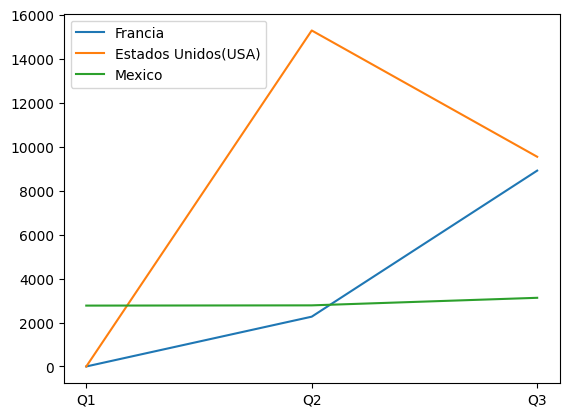

In [68]:
# converted months in quarter, in Q1: jan, feb, march, Q2: apr, may, june, Q3: july, aug, sep, Q4: oct, nov, dec. Order.Quantity in Q1 is 0, in Q2 sum of order_id for those months.
d = {'Country': ['Estados Unidos(USA)','Estados Unidos(USA)','Estados Unidos(USA)', 'Francia','Francia','Francia', 'Mexico', 'Mexico','Mexico'],
     'Quarter': ['Q1', 'Q2', 'Q3', 'Q1', 'Q2','Q3','Q1','Q2','Q3'],
     'Order.Quantity': [0, 15294, 9546, 0, 2267,8915,2771,2782,3126]}
df = pd.DataFrame(data=d)
print(df)
print('****************************************************')
print('Highest Orders from top 3 countries based on Quaters')

country_set = set(df['Country'])

plt.figure()
for country in country_set:
     selected_data = df.loc[df['Country'] == country]
     plt.plot(selected_data['Quarter'], selected_data['Order.Quantity'], label=country)

plt.legend()
plt.show()

**Top 3 markets are USA, France, and Mexico**.
1.  Mexico has steady sales acros the year
2.  Highest sell is in USA in Q2 across all regions
3.   France's highest sale is in Q3 which is half of Q2 sales of USA
4.   Western Europe will see maximum sale in Q3





In [69]:
df_orders['year'] = df_orders['order_date'].dt.year
df_orders.head(1)

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk,date,month,year
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,1,327.75,314.640015,91.25,DEBIT,3,4,Advance shipping,0,2018-01-31,jan,2018


In [70]:
hgh_odr_year = df_orders.groupby('year')['Order_Id'].count().sort_values(ascending=False)
hgh_odr_year

year
2015    62650
2016    62550
2017    53196
2018     2123
Name: Order_Id, dtype: int64

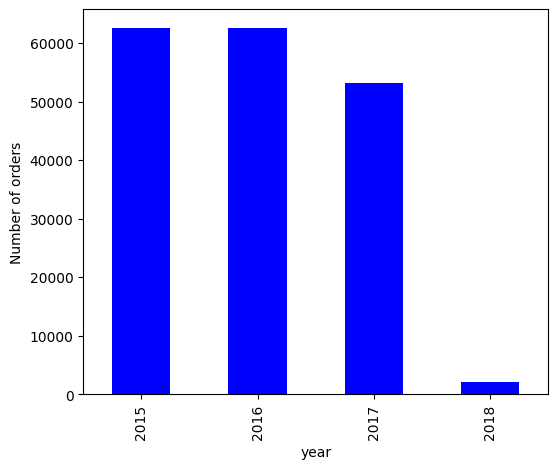

In [71]:
plt.figure(figsize=(6,5))
plt.xlabel('year')
plt.ylabel("Number of orders")
hgh_odr_year.plot(kind = 'bar', color = 'b')
plt.show()

The highest sales occurred in 2015, with a similar performance in 2016. There was a slight decrease in sales in 2017, but the most significant drop in sales was observed in 2018

In [72]:
#clsd_odr_sts = df_orders[df_orders['Order_Status'] == "CLOSED"].count()

In [73]:
prft_by_odr_sts = df_orders.groupby('Order_Status')['Order_Id'].count().sort_values(ascending = False)
prft_by_odr_sts

Order_Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order_Id, dtype: int64

Text(0.5, 1.0, 'Count of Order Status')

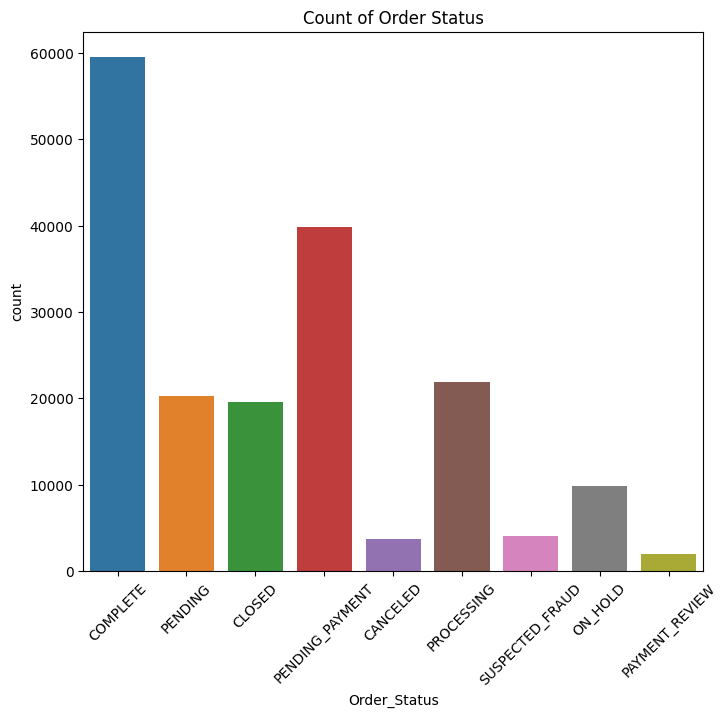

In [74]:
plt.figure(figsize =(8,7))
sns.countplot(data = df_orders, x = 'Order_Status')
plt.xticks(rotation=45)
plt.title('Count of Order Status')


32% of orders are completed, while 10% are closed. Cancelled orders make up 2% of the total, and pending orders account for 11%.

In [75]:
df_orders.shape

(180519, 27)

In [76]:
df_orders.head(1)

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk,date,month,year
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,1,327.75,314.640015,91.25,DEBIT,3,4,Advance shipping,0,2018-01-31,jan,2018


In [77]:
df_orders.columns

Index(['Order_Id', 'Order_Item_Cardprod_Id', 'Order_Customer_Id',
       'Order_Department_Id', 'Market', 'Order_City', 'Order_Country',
       'Order_Region', 'Order_State', 'Order_Status', 'Order_Zipcode',
       'order_date', 'Order_Item_Discount', 'Order_Item_Discount_Rate',
       'Order_Item_Id', 'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit', 'Type', 'Days_for_shipping_(real)',
       'Days_for_shipment_(scheduled)', 'Delivery_Status',
       'Late_Delivery_Risk', 'date', 'month', 'year'],
      dtype='object')

In [78]:
df_products.head(1)

,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status
0,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0


In [79]:
df_products.shape

(118, 6)

In [80]:
#Merging order table and product table
prdct_odr_tbl = df_orders.merge(df_products, left_on='Order_Item_Cardprod_Id', right_on = 'Product_Card_Id', how='inner')
prdct_odr_tbl.head()

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk,date,month,year,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,4,Advance shipping,0,2018-01-31,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
1,75939,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajasthan,PENDING,NaN,2018-01-13 12:27:00,...,4,Late delivery,1,2018-01-13,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
2,75938,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajasthan,CLOSED,NaN,2018-01-13 12:06:00,...,4,Shipping on time,0,2018-01-13,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
3,75937,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,NaN,2018-01-13 11:45:00,...,4,Advance shipping,0,2018-01-13,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
4,75936,1360,19489,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,NaN,2018-01-13 11:24:00,...,4,Advance shipping,0,2018-01-13,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0


In [81]:
prdct_odr_tbl.describe

<bound method NDFrame.describe of         Order_Id  Order_Item_Cardprod_Id  Order_Customer_Id  \
0          77202                    1360              20755   
1          75939                    1360              19492   
2          75938                    1360              19491   
3          75937                    1360              19490   
4          75936                    1360              19489   
...          ...                     ...                ...   
180514      6193                    1014               8934   
180515      6190                    1014               5296   
180516      6186                    1014               9144   
180517      6183                    1014               2673   
180518      6182                    1014               1073   

        Order_Department_Id        Market    Order_City Order_Country  \
0                         2  Pacific Asia        Bekasi     Indonesia   
1                         2  Pacific Asia       Bikaner        

In [82]:
hgh_prdct_odr = prdct_odr_tbl.groupby(['Order_Country','Product_Name','year'])['Order_Id'].count().sort_values(ascending=False)
hgh_prdct_odr

Order_Country   Product_Name                                   year
Estados Unidos  Perfect Fitness Perfect Rip Deck               2016    3578
                Nike Men's CJ Elite 2 TD Football Cleat        2016    3267
                Nike Men's Dri-FIT Victory Golf Polo           2016    3103
                O'Brien Men's Neoprene Life Vest               2016    2745
                Field & Stream Sportsman 16 Gun Fire Safe      2016    2499
                                                                       ... 
Finlandia       Nike Men's Kobe IX Elite Low Basketball Shoe   2017       1
                Nike Men's Comfort 2 Slide                     2015       1
                Nike Kids' Grade School KD VI Basketball Shoe  2017       1
                Glove It Women's Imperial Golf Glove           2015       1
Zimbabue        Under Armour Kids' Mercenary Slide             2016       1
Name: Order_Id, Length: 7212, dtype: int64

The most popular sales category in Estados Unidos (Central America) was fitness items, which reached its peak in 2015. Among the companies, Perfect Fitness, notably the Perfect Rip Deck, emerged as the most popular, surpassing even well-known brands like Nike.

In [83]:
hgh_prdct_odr.iloc[-5:]

Order_Country  Product_Name                                   year
Finlandia      Nike Men's Kobe IX Elite Low Basketball Shoe   2017    1
               Nike Men's Comfort 2 Slide                     2015    1
               Nike Kids' Grade School KD VI Basketball Shoe  2017    1
               Glove It Women's Imperial Golf Glove           2015    1
Zimbabue       Under Armour Kids' Mercenary Slide             2016    1
Name: Order_Id, dtype: int64

Lowest product items sales are sports related in Finlandia, and Zimbaue in 2017, 2015

In [84]:
hgh_prdct_odr.iloc[:20]

Order_Country   Product_Name                                   year
Estados Unidos  Perfect Fitness Perfect Rip Deck               2016    3578
                Nike Men's CJ Elite 2 TD Football Cleat        2016    3267
                Nike Men's Dri-FIT Victory Golf Polo           2016    3103
                O'Brien Men's Neoprene Life Vest               2016    2745
                Field & Stream Sportsman 16 Gun Fire Safe      2016    2499
                Pelican Sunstream 100 Kayak                    2016    2228
                Diamondback Women's Serene Classic Comfort Bi  2016    1973
                Nike Men's Free 5.0+ Running Shoe              2016    1673
                Under Armour Girls' Toddler Spine Surge Runni  2016    1518
Francia         Perfect Fitness Perfect Rip Deck               2015    1003
Mexico          Perfect Fitness Perfect Rip Deck               2015     943
                Nike Men's CJ Elite 2 TD Football Cleat        2017     924
                Perf

In [85]:
#d = {'Country': ['Estados Unidos(USA)','Estados Unidos(USA)','Estados Unidos(USA)', 'Estados Unidos(USA)','Estados Unidos(USA)'],'Product_Name': ['Perfect Fitness', 'Nike Mens CJ', 'Nike Mens Dri-FIT ', 'OBrien Mens', 'Gun FireSafe'],'Order.Quantity': [3578, 3276, 3103, 2745, 2499]}
#df = pd.DataFrame(data=d)
#print(df)
#print('****************************************************')
#print('Highest Orders from top 1 country based on products')

#country_set = set(df['Country'])
#product_set = set(df['Product_Name'])

#plt.figure()
#for product in country_set:
     #selected_data = df.loc[df['Country'] == country]
     #plt.plot(selected_data['Product_Name'], selected_data['Order.Quantity'], label=country)

#plt.legend()
#plt.show()

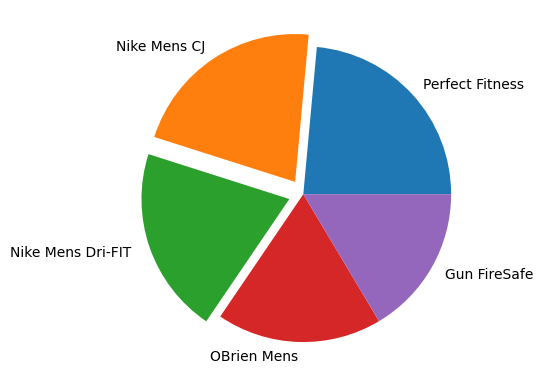

In [86]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([3578, 3276, 3103, 2745, 2499])
lab = ['Perfect Fitness', 'Nike Mens CJ', 'Nike Mens Dri-FIT ', 'OBrien Mens', 'Gun FireSafe']
exp = [0,0.1,0.1,0,0]

plt.pie(y,labels=lab,explode=exp)
plt.show()
# % of Nike (3276+3103)/(3578+3276+3103+2745+2499) = 6379/15201 =0.419

Nike is the most popular brand. It has 42% in sports categoy.Perfect Fitnes has 23%

In [87]:
hgh_prdct_odr = prdct_odr_tbl.groupby(['Order_Country','Product_Name','year'])['Order_Id'].count().sort_values(ascending=False)
hgh_prdct_odr

Order_Country   Product_Name                                   year
Estados Unidos  Perfect Fitness Perfect Rip Deck               2016    3578
                Nike Men's CJ Elite 2 TD Football Cleat        2016    3267
                Nike Men's Dri-FIT Victory Golf Polo           2016    3103
                O'Brien Men's Neoprene Life Vest               2016    2745
                Field & Stream Sportsman 16 Gun Fire Safe      2016    2499
                                                                       ... 
Finlandia       Nike Men's Kobe IX Elite Low Basketball Shoe   2017       1
                Nike Men's Comfort 2 Slide                     2015       1
                Nike Kids' Grade School KD VI Basketball Shoe  2017       1
                Glove It Women's Imperial Golf Glove           2015       1
Zimbabue        Under Armour Kids' Mercenary Slide             2016       1
Name: Order_Id, Length: 7212, dtype: int64

In [88]:
hgh_prce_itm = prdct_odr_tbl.groupby('Product_Name')['Product_Price'].mean().sort_values(ascending=False)
hgh_prce_itm

Product_Name
SOLE E35 Elliptical                       1999.98999
Dell Laptop                               1500.00000
SOLE E25 Elliptical                        999.98999
Bowflex SelectTech 1090 Dumbbells          599.98999
Bushnell Pro X7 Jolt Slope Rangefinder     599.98999
                                             ...    
Hirzl Women's Hybrid Golf Glove             14.99000
Hirzl Men's Hybrid Golf Glove               14.99000
Toys                                        11.54000
CDs of rock                                 11.29000
Clicgear 8.0 Shoe Brush                      9.99000
Name: Product_Price, Length: 118, dtype: float64

Highest averge price is SOLE E35 Elliptical(Cardio equipment) than Dell laptop

In [89]:
prdct_odr_tbl.head(1)

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Days_for_shipment_(scheduled),Delivery_Status,Late_Delivery_Risk,date,month,year,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,4,Advance shipping,0,2018-01-31,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0


In [90]:
df_categories.head(1)

,Category_Id,Category_Name
0,73,Sporting Goods


In [91]:
cat_odr_pdct_tbl = prdct_odr_tbl.merge(df_categories,left_on='Product_Category_Id', right_on='Category_Id', how = 'inner')
cat_odr_pdct_tbl.head(3)

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Late_Delivery_Risk,date,month,year,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status,Category_Id,Category_Name
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,0,2018-01-31,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,73,Sporting Goods
1,75939,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajasthan,PENDING,NaN,2018-01-13 12:27:00,...,1,2018-01-13,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,73,Sporting Goods
2,75938,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajasthan,CLOSED,NaN,2018-01-13 12:06:00,...,0,2018-01-13,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,73,Sporting Goods


In [92]:
sale_by_cat = cat_odr_pdct_tbl.groupby(['Order_Country', 'Category_Name'])['Order_Id'].count().sort_values(ascending = False)
sale_by_cat.iloc[:50]

Order_Country   Category_Name       
Estados Unidos  Cleats                  3578
                Men's Footwear          3267
                Women's Apparel         3103
                Indoor/Outdoor Games    2745
                Fishing                 2499
                Water Sports            2228
                Camping & Hiking        1973
Mexico          Cleats                  1854
Francia         Cleats                  1824
Mexico          Men's Footwear          1728
Estados Unidos  Cardio Equipment        1724
                Shop By Sport           1578
Mexico          Women's Apparel         1551
Francia         Men's Footwear          1544
                Women's Apparel         1544
Mexico          Indoor/Outdoor Games    1511
Francia         Indoor/Outdoor Games    1358
Mexico          Fishing                 1323
Alemania        Cleats                  1281
Francia         Fishing                 1269
Mexico          Water Sports            1207
Alemania        Me

In [93]:
cmplt_cat_odr_pdct = cat_odr_pdct_tbl[cat_odr_pdct_tbl['Order_Status'] == 'COMPLETE']
cmplt_cat_odr_pdct

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Late_Delivery_Risk,date,month,year,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status,Category_Id,Category_Name
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,0,2018-01-31,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,73,Sporting Goods
3,75937,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,NaN,2018-01-13 11:45:00,...,0,2018-01-13,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,73,Sporting Goods
6,75934,1360,19487,2,Pacific Asia,Guangzhou,China,Eastern Asia,Guangdong,COMPLETE,NaN,2018-01-13 10:42:00,...,1,2018-01-13,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,73,Sporting Goods
13,75927,1360,19480,2,Pacific Asia,Sangli,India,South Asia,Maharashtra,COMPLETE,NaN,2018-01-13 08:15:00,...,1,2018-01-13,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,73,Sporting Goods
15,75925,1360,19478,2,Pacific Asia,Sangli,India,South Asia,Maharashtra,COMPLETE,NaN,2018-01-13 07:33:00,...,1,2018-01-13,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,73,Sporting Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180510,6213,1014,5070,7,LATAM,La Ceiba,Honduras,Central America,Atlantida,COMPLETE,NaN,2015-04-01 16:20:00,...,1,2015-04-01,apr,2015,1014,46,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.98,0,46,Indoor/Outdoor Games
180511,6213,1014,5070,7,LATAM,La Ceiba,Honduras,Central America,Atlantida,COMPLETE,NaN,2015-04-01 16:20:00,...,1,2015-04-01,apr,2015,1014,46,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.98,0,46,Indoor/Outdoor Games
180513,6195,1014,1918,7,LATAM,San Jose de Guanipa,Venezuela,South America,AnzoÌÁtegui,COMPLETE,NaN,2015-04-01 10:02:00,...,1,2015-04-01,apr,2015,1014,46,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.98,0,46,Indoor/Outdoor Games
180514,6193,1014,8934,7,LATAM,Ilopango,El Salvador,Central America,San Salvador,COMPLETE,NaN,2015-04-01 09:20:00,...,0,2015-04-01,apr,2015,1014,46,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.98,0,46,Indoor/Outdoor Games


In [94]:
df_customers.describe

<bound method NDFrame.describe of        Customer Id Customer City Customer Country Customer Email  \
0            20755        Caguas      Puerto Rico      XXXXXXXXX   
1            19492        Caguas      Puerto Rico      XXXXXXXXX   
2            19491      San Jose          EE. UU.      XXXXXXXXX   
3            19490   Los Angeles          EE. UU.      XXXXXXXXX   
4            19489        Caguas      Puerto Rico      XXXXXXXXX   
...            ...           ...              ...            ...   
20647        18586        Caguas      Puerto Rico      XXXXXXXXX   
20648        16322        Caguas      Puerto Rico      XXXXXXXXX   
20649        18579        Caguas      Puerto Rico      XXXXXXXXX   
20650        16244        Caguas      Puerto Rico      XXXXXXXXX   
20651         2677        Caguas      Puerto Rico      XXXXXXXXX   

      Customer Fname Customer Lname Customer Password Customer Segment  \
0              Cally       Holloway         XXXXXXXXX         Consumer   
1

In [95]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer Id        20652 non-null  int64  
 1   Customer City      20652 non-null  object 
 2   Customer Country   20652 non-null  object 
 3   Customer Email     20652 non-null  object 
 4   Customer Fname     20652 non-null  object 
 5   Customer Lname     20644 non-null  object 
 6   Customer Password  20652 non-null  object 
 7   Customer Segment   20652 non-null  object 
 8   Customer State     20652 non-null  object 
 9   Customer Street    20652 non-null  object 
 10  Customer Zipcode   20649 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


In [96]:
df_customers.isnull().any()

Customer Id          False
Customer City        False
Customer Country     False
Customer Email       False
Customer Fname       False
Customer Lname        True
Customer Password    False
Customer Segment     False
Customer State       False
Customer Street      False
Customer Zipcode      True
dtype: bool

In [97]:
df_customers.head()

,Customer Id,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode
0,20755,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0
1,19492,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0
2,19491,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0
3,19490,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0
4,19489,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0


In [98]:
df_customers.columns = df_customers.columns.str.replace(' ', '_')

In [99]:
df_customers.tail()

,Customer_Id,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode
20647,18586,Caguas,Puerto Rico,XXXXXXXXX,Diana,Tran,XXXXXXXXX,Home Office,PR,1802 Broad Carrefour,725.0
20648,16322,Caguas,Puerto Rico,XXXXXXXXX,Anika,Davenport,XXXXXXXXX,Home Office,PR,8284 Colonial Gate Path,725.0
20649,18579,Caguas,Puerto Rico,XXXXXXXXX,Yuri,Smith,XXXXXXXXX,Home Office,PR,2248 Heather Mews,725.0
20650,16244,Caguas,Puerto Rico,XXXXXXXXX,Hyacinth,Witt,XXXXXXXXX,Home Office,PR,7247 Honey Prairie Field,725.0
20651,2677,Caguas,Puerto Rico,XXXXXXXXX,Mary,Davis,XXXXXXXXX,Home Office,PR,6422 Sleepy Swale,725.0


In [100]:
#joining FName and LName
df_customers['Customer_Name'] = df_customers[['Customer_Fname', 'Customer_Lname']].apply(lambda x : x.str.cat(sep=' '),axis=1)

In [101]:
#Dropping Customer Fname and LName
df_customers.drop(['Customer_Fname', 'Customer_Lname'], axis =1, inplace = True)

In [102]:
df_customers.head(1)

,Customer_Id,Customer_City,Customer_Country,Customer_Email,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Customer_Name
0,20755,Caguas,Puerto Rico,XXXXXXXXX,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,Cally Holloway


In [103]:
df_customers.Customer_Email.value_counts

<bound method IndexOpsMixin.value_counts of 0        XXXXXXXXX
1        XXXXXXXXX
2        XXXXXXXXX
3        XXXXXXXXX
4        XXXXXXXXX
           ...    
20647    XXXXXXXXX
20648    XXXXXXXXX
20649    XXXXXXXXX
20650    XXXXXXXXX
20651    XXXXXXXXX
Name: Customer_Email, Length: 20652, dtype: object>

In [104]:
#Customer Email and Password are hidden, no need to keep in the data set, dropping those columns
df_customers.drop(['Customer_Email','Customer_Password'], axis = 1, inplace = True)
df_customers.head(1)

,Customer_Id,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Customer_Name
0,20755,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725.0,Cally Holloway


In [105]:
def fix_zip(series):
      #return series.astype(str).str.split('-').str[0].str.zfill(6)
      return series.astype(str).str.extract('(\d+)', expand=False).str.zfill(6)
df_customers['Clean_Zipcode'] = fix_zip(df_customers['Customer_Zipcode'])


In [106]:
df_customers.head(5)

,Customer_Id,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Customer_Name,Clean_Zipcode
0,20755,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725.0,Cally Holloway,000725
1,19492,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,725.0,Irene Luna,000725
2,19491,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125.0,Gillian Maldonado,095125
3,19490,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027.0,Tana Tate,090027
4,19489,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,725.0,Orli Hendricks,000725


In [107]:
# we don't need Customer_zipcode, we will use clean_zipcode
df_customers.drop('Customer_Zipcode', axis = 1, inplace = True)
df_customers.head(1)

,Customer_Id,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Name,Clean_Zipcode
0,20755,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,Cally Holloway,000725


In [108]:
dup_rows_cus = df_customers[df_customers.duplicated()]
dup_rows_cus

,Customer_Id,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Name,Clean_Zipcode


In [109]:
#Which Country have most customers
hgh_cus_cntry = df_customers.groupby('Customer_Country')['Customer_Id'].count().sort_values(ascending = False)
hgh_cus_cntry

Customer_Country
EE. UU.        12719
Puerto Rico     7933
Name: Customer_Id, dtype: int64

In [110]:
#Replacing EE.UU to Estados Unidos(USA)
df_customers['Customer_Country'].replace(to_replace={'EE. UU.':'Estados Unidos(USA)'}, inplace = True)
df_customers.head(1)

,Customer_Id,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Name,Clean_Zipcode
0,20755,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,Cally Holloway,000725


Text(0.5, 1.0, "Customer's Country")

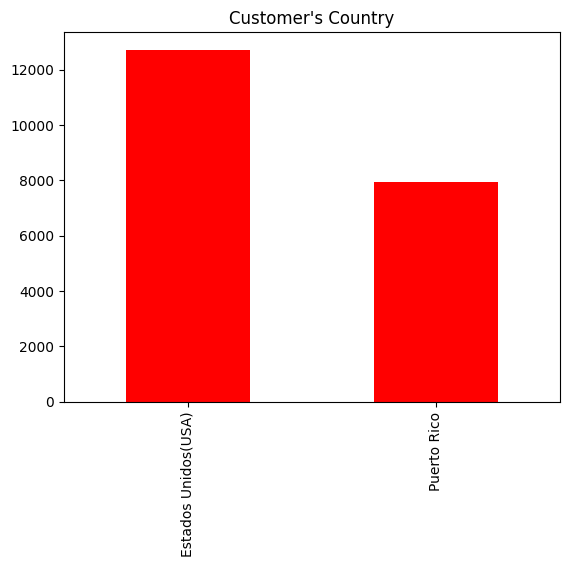

In [111]:
df_customers.Customer_Country.value_counts().plot(kind = 'bar', color = 'r')
plt.title("Customer's Country")

In [112]:
cat_odr_pdct_tbl.head(1)

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Late_Delivery_Risk,date,month,year,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status,Category_Id,Category_Name
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,0,2018-01-31,jan,2018,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,73,Sporting Goods


In [113]:
df_customers.head(1)

,Customer_Id,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Name,Clean_Zipcode
0,20755,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,Cally Holloway,000725


In [114]:
#Merging customer table
cat_cus_odr_pdct = cat_odr_pdct_tbl.merge(df_customers, left_on = 'Order_Customer_Id', right_on = 'Customer_Id', how ='inner')
cat_cus_odr_pdct.head()

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Product_Price,Product_Status,Category_Id,Category_Name,Customer_Id,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Name,Clean_Zipcode
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,327.75,0,73,Sporting Goods,20755,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,Cally Holloway,000725
1,75939,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajasthan,PENDING,NaN,2018-01-13 12:27:00,...,327.75,0,73,Sporting Goods,19492,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,Irene Luna,000725
2,75938,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajasthan,CLOSED,NaN,2018-01-13 12:06:00,...,327.75,0,73,Sporting Goods,19491,San Jose,Estados Unidos(USA),Consumer,CA,8510 Round Bear Gate,Gillian Maldonado,095125
3,75937,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,NaN,2018-01-13 11:45:00,...,327.75,0,73,Sporting Goods,19490,Los Angeles,Estados Unidos(USA),Home Office,CA,3200 Amber Bend,Tana Tate,090027
4,75936,1360,19489,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,NaN,2018-01-13 11:24:00,...,327.75,0,73,Sporting Goods,19489,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,Orli Hendricks,000725


In [115]:
cat_cus_odr_pdct.shape

(180519, 43)

In [116]:
cat_cus_odr_pdct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180519 entries, 0 to 180518
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Order_Id                       180519 non-null  int64         
 1   Order_Item_Cardprod_Id         180519 non-null  int64         
 2   Order_Customer_Id              180519 non-null  int64         
 3   Order_Department_Id            180519 non-null  int64         
 4   Market                         180519 non-null  object        
 5   Order_City                     180519 non-null  object        
 6   Order_Country                  180519 non-null  object        
 7   Order_Region                   180519 non-null  object        
 8   Order_State                    180519 non-null  object        
 9   Order_Status                   180519 non-null  object        
 10  Order_Zipcode                  24840 non-null   float64       
 11  

There are only null values in Clean_Zipcode column.

In [117]:
df_departments.head(5)

,Department Id,Department Name,Latitude,Longitude
0,2,Fitness,18.251453,-66.037056
1,2,Fitness,18.279451,-66.037064
2,2,Fitness,37.292233,-121.881279
3,2,Fitness,34.125946,-118.291016
4,2,Fitness,18.253769,-66.037048


In [118]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41956 entries, 0 to 41955
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department Id    41956 non-null  int64  
 1   Department Name  41956 non-null  object 
 2   Latitude         41956 non-null  float64
 3   Longitude        41956 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ MB


In [119]:
df_departments.columns = df_departments.columns.str.replace(' ', '_')
df_departments.head(1)

,Department_Id,Department_Name,Latitude,Longitude
0,2,Fitness,18.251453,-66.037056


In [120]:
hgh_dept = df_departments.groupby('Department_Name')['Department_Id'].count().sort_values(ascending = False)
hgh_dept

Department_Name
Apparel               8997
Fan Shop              8541
Golf                  7663
Footwear              5939
Outdoors              4966
Fitness               1905
Discs Shop            1564
Technology            1283
Book Shop              390
Pet Shop               356
Health and Beauty      352
Name: Department_Id, dtype: int64

Text(0.5, 1.0, 'Top 10 Department Name')

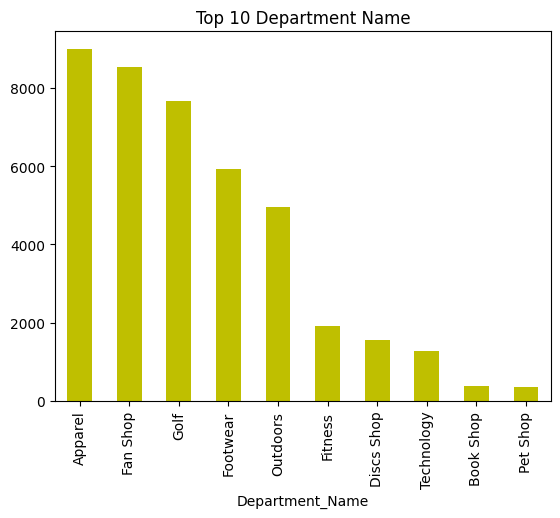

In [121]:
hgh_dept.iloc[:10].plot(kind = 'bar', color = 'y')
plt.title("Top 10 Department Name")

Apparel has the maximum department, slightly same as Fan shop. Than Golf, Footwear and outdoors etc.

In [122]:
df_departments.head(1)

,Department_Id,Department_Name,Latitude,Longitude
0,2,Fitness,18.251453,-66.037056


In [123]:
cat_cus_odr_pdct.head(1)

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Product_Price,Product_Status,Category_Id,Category_Name,Customer_Id,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Name,Clean_Zipcode
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,327.75,0,73,Sporting Goods,20755,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,Cally Holloway,000725


In [124]:
#d1_dpt_two = cat_cus_odr_pdct[cat_cus_odr_pdct['Order_Department_Id'] == 2]
#d1_dpt_two.to_csv('dpt_two.csv', index=False)


In [125]:
#cat_cus_odr_pdct.to_csv('cln_cat_cus_odr_pdct.csv', encoding='utf-8', index = False)

In [126]:
#merging department table
#cat_cus_dept_pdct_oder = cat_cus_odr_pdct.merge(df_departments, left_on = 'Order_Department_Id', right_on = 'Department_Id', how = 'inner')
#cat_cus_dept_pdct_oder.head()

#merge cat_cus_odr_pdct_dpt_two with department
#cat_cus_dept_pdct_oder_dpt_two = d1_dpt_two.merge(df_departments, left_on = 'Order_Department_Id', right_on = 'Department_Id', how = 'inner')
#cat_cus_dept_pdct_oder_dpt_two.head()

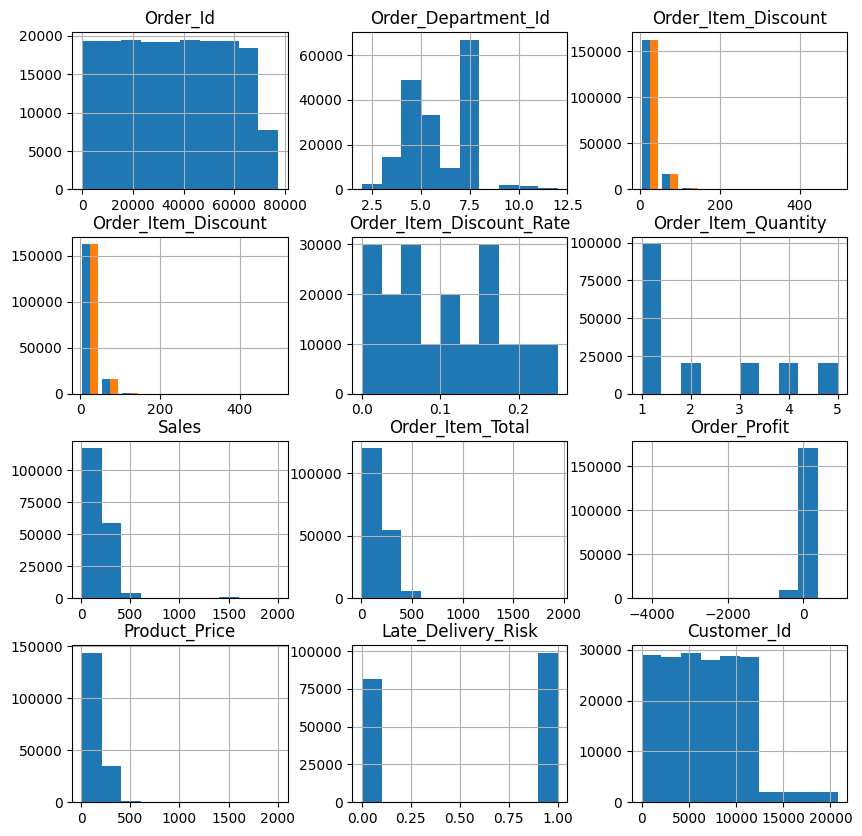

In [127]:
Req_col = ['Order_Id', 'Order_Department_Id', 'Order_Item_Discount', 'Order_Item_Discount','Order_Item_Discount_Rate','Order_Item_Quantity','Sales','Order_Item_Total', 'Order_Profit','Product_Price','Late_Delivery_Risk','Customer_Id']
cat_cus_odr_pdct.hist(column = Req_col, figsize = (10,10), bins = 10)
plt.show()

In [128]:
cat_cus_odr_pdct_odr_sts = cat_cus_odr_pdct[cat_cus_odr_pdct['Order_Status'] == 'COMPLETE']
cat_cus_odr_pdct_odr_sts.head()

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Product_Price,Product_Status,Category_Id,Category_Name,Customer_Id,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Name,Clean_Zipcode
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,327.75,0,73,Sporting Goods,20755,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,Cally Holloway,000725
3,75937,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,NaN,2018-01-13 11:45:00,...,327.75,0,73,Sporting Goods,19490,Los Angeles,Estados Unidos(USA),Home Office,CA,3200 Amber Bend,Tana Tate,090027
6,75934,1360,19487,2,Pacific Asia,Guangzhou,China,Eastern Asia,Guangdong,COMPLETE,NaN,2018-01-13 10:42:00,...,327.75,0,73,Sporting Goods,19487,Caguas,Puerto Rico,Home Office,PR,1879 Green Pine Bank,Constance Terrell,000725
13,75927,1360,19480,2,Pacific Asia,Sangli,India,South Asia,Maharashtra,COMPLETE,NaN,2018-01-13 08:15:00,...,327.75,0,73,Sporting Goods,19480,Caguas,Puerto Rico,Corporate,PR,2531 Wishing Square,Natalie Mcfadden,000725
15,75925,1360,19478,2,Pacific Asia,Sangli,India,South Asia,Maharashtra,COMPLETE,NaN,2018-01-13 07:33:00,...,327.75,0,73,Sporting Goods,19478,Caguas,Puerto Rico,Corporate,PR,257 Harvest Close,Sade Lancaster,000725


In [129]:
cat_cus_odr_pdct_odr_sts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59491 entries, 0 to 180518
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Order_Id                       59491 non-null  int64         
 1   Order_Item_Cardprod_Id         59491 non-null  int64         
 2   Order_Customer_Id              59491 non-null  int64         
 3   Order_Department_Id            59491 non-null  int64         
 4   Market                         59491 non-null  object        
 5   Order_City                     59491 non-null  object        
 6   Order_Country                  59491 non-null  object        
 7   Order_Region                   59491 non-null  object        
 8   Order_State                    59491 non-null  object        
 9   Order_Status                   59491 non-null  object        
 10  Order_Zipcode                  8437 non-null   float64       
 11  order_date    

In [130]:
#Dropping latitude and longitude
df_departments.drop(['Latitude','Longitude'], axis=1, inplace = True)
df_departments.head(1)

,Department_Id,Department_Name
0,2,Fitness


In [131]:
df_departments.shape

(41956, 2)

In [132]:
unique_dept = df_departments.drop_duplicates(subset='Department_Id', inplace=True)
unique_dept

In [133]:
df_departments.shape

(11, 2)

In [134]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 2717
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Department_Id    11 non-null     int64 
 1   Department_Name  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 264.0+ bytes


In [135]:
df_departments.Department_Name.value_counts()

Fitness               1
Apparel               1
Golf                  1
Footwear              1
Outdoors              1
Fan Shop              1
Technology            1
Book Shop             1
Discs Shop            1
Pet Shop              1
Health and Beauty     1
Name: Department_Name, dtype: int64

In [136]:
cmplt_cat_cus_dept_odr_pdct = cat_cus_odr_pdct.merge(df_departments, left_on = 'Order_Department_Id', right_on = 'Department_Id', how = 'inner')
cmplt_cat_cus_dept_odr_pdct.head(3)

,Order_Id,Order_Item_Cardprod_Id,Order_Customer_Id,Order_Department_Id,Market,Order_City,Order_Country,Order_Region,Order_State,Order_Status,Order_Zipcode,order_date,...,Category_Id,Category_Name,Customer_Id,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Name,Clean_Zipcode,Department_Id,Department_Name
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,NaN,2018-01-31 22:56:00,...,73,Sporting Goods,20755,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,Cally Holloway,000725,2,Fitness
1,75939,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajasthan,PENDING,NaN,2018-01-13 12:27:00,...,73,Sporting Goods,19492,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,Irene Luna,000725,2,Fitness
2,75938,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajasthan,CLOSED,NaN,2018-01-13 12:06:00,...,73,Sporting Goods,19491,San Jose,Estados Unidos(USA),Consumer,CA,8510 Round Bear Gate,Gillian Maldonado,095125,2,Fitness


In [137]:
#cmplt_cat_cus_dept_odr_pdct.to_csv('cln_cmplt_cat_cus_dept_odr_pdct.csv', encoding='utf-8', index = False)

<ipython-input-138-8b9a0a5f80c0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cmplt_cat_cus_dept_odr_pdct.corr()


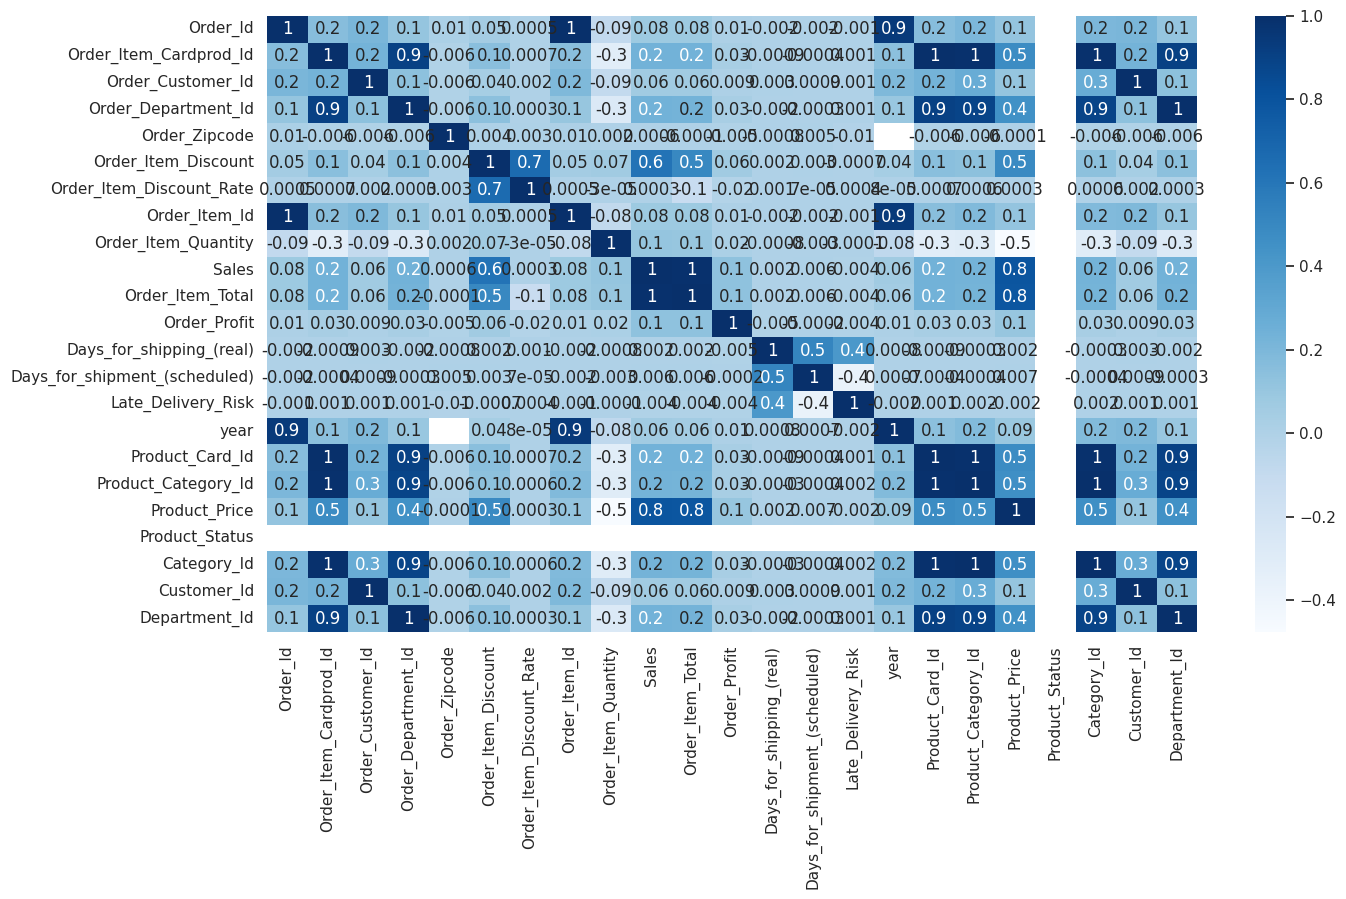

In [138]:
plt.figure(figsize=(15,8))
sns.set_theme(style="white")
corr = cmplt_cat_cus_dept_odr_pdct.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

Category_Id shows strong correlations with Order_Item_Carprod_Id, Order_department_Id, Department_Id, Product_card_Id, and ProductCatgory_Id. These variables share a significant relationship with Category_Id.

Product Price is positively correlated with Sales and Order_Item_Total, indicating that changes in product price tend to be associated with corresponding changes in sales and order item totals.

Customer_Id exhibits a strong positive correlation with Order_Customer_Id and weaker correlations with other attributes.

# New Section